In [1]:
import pandas as pd

df = pd.read_csv("physics_and_chemistry_nobel_laureate.csv")

In [2]:
df.head()

,year,name,country,category,biography
0,1901,Wilhelm Röntgen,German Empire,Physics,Wilhelm Conrad Röntgen (; German pronunciation...
1,1902,Hendrik Lorentz,Netherlands,Physics,Hendrik Antoon Lorentz (; 18 July 1853 – 4 Feb...
2,1902,Pieter Zeeman,Netherlands,Physics,Pieter Zeeman (Dutch: [ˈzeːmɑn]; 25 May 1865 –...
3,1903,Henri Becquerel,France,Physics,Antoine Henri Becquerel (; French pronunciatio...
4,1903,Pierre Curie,France,Physics,"Pierre Curie ( KURE-ee, French: [pjɛʁ kyʁi]; 1..."


In [3]:
df.drop(["year", "name", "country"], axis=1, inplace=True)

Sentences

Min/max/avg number of sentences per category together with the corresponding histograms and box plots

In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def n_sentences(row):
  doc = nlp(row)
  sents = [sent for sent in doc.sents]
  length_bio = len(sents)
  return length_bio


In [6]:
df["n_sentences"] = df["biography"].apply(n_sentences)

In [7]:
df["n_sentences"]

0       83
1      157
2       56
3       83
4       78
      ... 
195     57
196     43
197     92
198     28
199     23
Name: n_sentences, Length: 200, dtype: int64

In [8]:
sum_lengths = df.groupby("category").sum("n_sentences")
sum_lengths

,n_sentences
category,
Chemistry,7659
Physics,13488


In [9]:
mean_len = df.groupby("category").mean("n_sentences")
mean_len

,n_sentences
category,
Chemistry,76.59
Physics,134.88


In [10]:
max_len = df.groupby("category").max("n_sentences")
max_len

,n_sentences
category,
Chemistry,487
Physics,775


In [11]:
min_len = df.groupby("category").min("n_sentences")
min_len

,n_sentences
category,
Chemistry,17
Physics,24


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

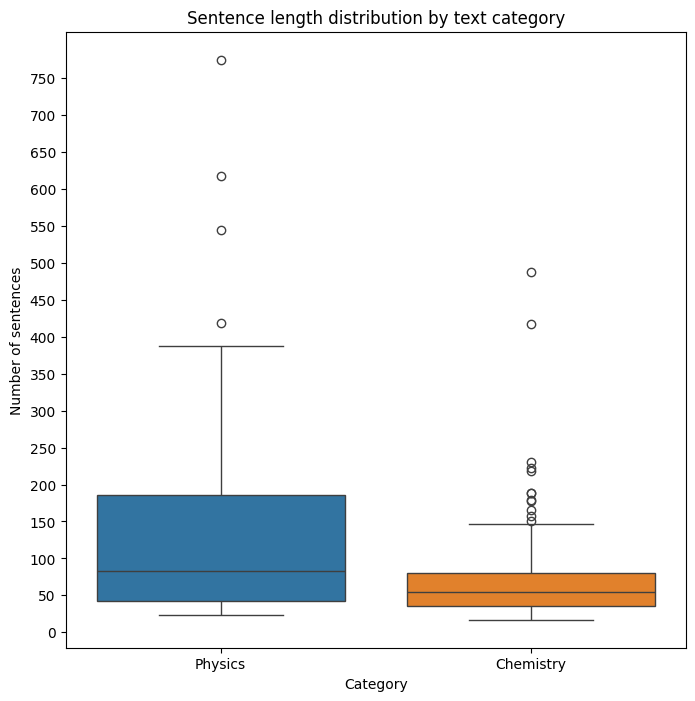

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_yticks(np.arange(0, 800, 50))
sns.boxplot(data = df, y = "n_sentences", x = "category", hue="category")

plt.title("Sentence length distribution by text category")
plt.ylabel("Number of sentences")
plt.xlabel("Category")

plt.show()


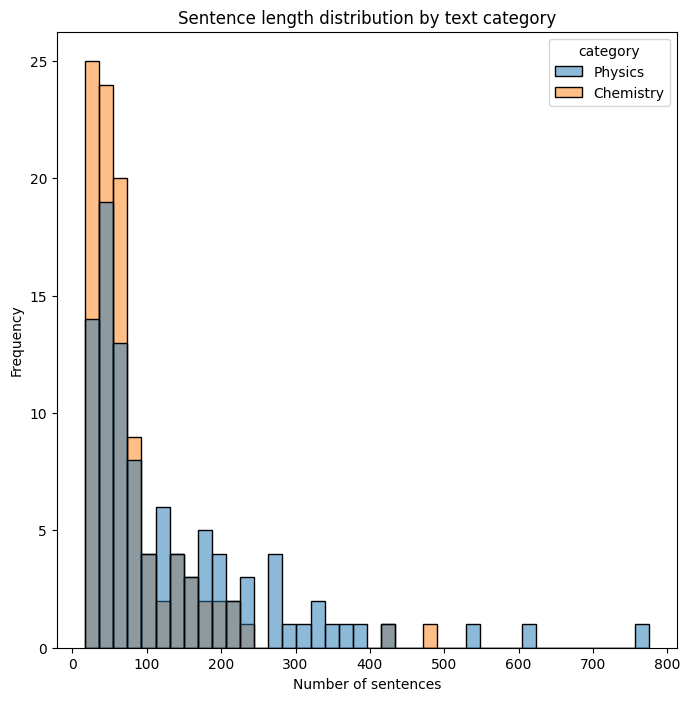

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

# ax.set_xticks(np.arange(0, 800, 50))
sns.histplot(data = df, x="n_sentences", hue="category", bins=40)

plt.title("Sentence length distribution by text category")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")

plt.show()

## BIgram exercise

In [5]:
#fuction pull text into string

def get_texts(df, category):

    df = df[df['category'] == category]
    #concatenate all into one string
    all_physics_texts = ' '.join(df['biography'].tolist())
    return all_physics_texts




In [6]:
text_physics = get_texts(df, "Physics")
text_chemistry = get_texts(df, "Chemistry")


In [8]:
text_chemistry

'Jacobus Henricus van \'t Hoff Jr. (Dutch: [vɑn (ə)t ˈɦɔf]; 30 August 1852 – 1 March 1911) was a Dutch physical chemist. A highly influential theoretical chemist of his time, van \'t Hoff was the first winner of the Nobel Prize in Chemistry. His pioneering work helped found the modern theory of chemical affinity, chemical equilibrium, chemical kinetics, and chemical thermodynamics. In his 1874 pamphlet, van \'t Hoff formulated the theory of the tetrahedral carbon atom and laid the foundations of stereochemistry. In 1875, he predicted the correct structures of allenes and cumulenes as well as their axial chirality. He is also widely considered one of the founders of physical chemistry as the discipline is known today.\r\n\r\n\r\n== Biography ==\r\nThe third of seven children, van \'t Hoff was born in Rotterdam, Netherlands, 30 August 1852. His father was Jacobus Henricus van \'t Hoff Sr., a physician, and his mother was Alida Kolff van \'t Hoff.  From a young age, he was interested in s

In [7]:
text_physics

'Wilhelm Conrad Röntgen (; German pronunciation: [ˈvɪlhɛlm ˈʁœntɡən] ; 27 March 1845 – 10 February 1923) was a German mechanical engineer and physicist, who, on 8 November 1895, produced and detected electromagnetic radiation in a wavelength range known as X-rays or Röntgen rays, an achievement that earned him the inaugural Nobel Prize in Physics in 1901. In honour of Röntgen\'s accomplishments, in 2004 the International Union of Pure and Applied Chemistry (IUPAC) named element 111, roentgenium, a radioactive element with multiple unstable isotopes, after him. The unit of measurement roentgen was also named after him.\r\n\r\n\r\n== Biographical history ==\r\n\r\n\r\n=== Education ===\r\nHe was born to Friedrich Conrad Röntgen, a German merchant and cloth manufacturer, and Charlotte Constanze Frowein. At age three his family moved to the Netherlands where his mother\'s family lived. Röntgen attended high school at Utrecht Technical School in Utrecht, Netherlands. He followed courses at 

In [18]:
# !pip install nltk

In [9]:
import nltk
# nltk.download('punkt')
from nltk import bigrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
tokens = word_tokenize(text_physics)

In [11]:
len(tokens)

303429

In [12]:
tokens_set = set(tokens)

In [13]:
len(tokens_set)

23817

### Filtering tokens

In [14]:
stopwords = stopwords.words('english')

In [15]:
import re

Custom filter for non-desirable characters

In [16]:
def contains_alpha(word):
    regex = r'\w'
    search = re.match(regex, word)
    boolean = bool(search)
    return boolean 

In [17]:
contains_alpha("()")

False

In [18]:
contains_no_alphanum = [token for token in tokens if contains_alpha(token.lower()) == False]

In [100]:
# contains_no_alphanum

In [101]:
filter_list = stopwords + contains_no_alphanum

Filtering the tokens

In [124]:
filter_tokens = [token for token in tokens_set if token.lower() not in contains_no_alphanum]

In [125]:
# filter_tokens

For the totality of the category

### Counting ngrams

### smth is off from this point onwards here

In [126]:
from nltk.util import bigrams
from nltk.lm import NgramCounter

In [127]:
text_bigrams = list(bigrams(filter_tokens))

In [128]:
# text_bigrams

In [129]:
counts = nltk.FreqDist(text_bigrams)
counts

FreqDist({('Earl', 'farmer'): 1, ('farmer', '918243948'): 1, ('918243948', 'dexterity'): 1, ('dexterity', 'inversion'): 1, ('inversion', 'Kumar'): 1, ('Kumar', 'diffracted'): 1, ('diffracted', 'ill.'): 1, ('ill.', 'touring'): 1, ('touring', 'Józio'): 1, ('Józio', '53116'): 1, ...})

In [130]:
for k, val in counts.items():
    # print(val)
    if val > 1:
        print(k)

For sentence for category

In [131]:
from nltk import sent_tokenize

In [132]:
sentence_text = sent_tokenize(text_chemistry)

In [36]:
tokens_sentences = [word_tokenize(sent) for sent in sentence_text]

In [133]:
sentences_bigrams = [list(bigrams(tokens_sent)) for tokens_sent in tokens_sentences]

In [134]:
count_sent_bigrams = [dict(nltk.FreqDist(sent_bigrams)) for sent_bigrams in sentences_bigrams]

# this gives a list of dictionaries. each dictionary represents the bigram count for the particular sentence

In [135]:
count_sent_bigrams

[{('Jacobus', 'Henricus'): 1,
  ('Henricus', 'van'): 1,
  ('van', "'t"): 1,
  ("'t", 'Hoff'): 1,
  ('Hoff', 'Jr.'): 1,
  ('Jr.', '('): 1,
  ('(', 'Dutch'): 1,
  ('Dutch', ':'): 1,
  (':', '['): 1,
  ('[', 'vɑn'): 1,
  ('vɑn', '('): 1,
  ('(', 'ə'): 1,
  ('ə', ')'): 1,
  (')', 't'): 1,
  ('t', 'ˈɦɔf'): 1,
  ('ˈɦɔf', ']'): 1,
  (']', ';'): 1,
  (';', '30'): 1,
  ('30', 'August'): 1,
  ('August', '1852'): 1,
  ('1852', '–'): 1,
  ('–', '1'): 1,
  ('1', 'March'): 1,
  ('March', '1911'): 1,
  ('1911', ')'): 1,
  (')', 'was'): 1,
  ('was', 'a'): 1,
  ('a', 'Dutch'): 1,
  ('Dutch', 'physical'): 1,
  ('physical', 'chemist'): 1,
  ('chemist', '.'): 1},
 {('A', 'highly'): 1,
  ('highly', 'influential'): 1,
  ('influential', 'theoretical'): 1,
  ('theoretical', 'chemist'): 1,
  ('chemist', 'of'): 1,
  ('of', 'his'): 1,
  ('his', 'time'): 1,
  ('time', ','): 1,
  (',', 'van'): 1,
  ('van', "'t"): 1,
  ("'t", 'Hoff'): 1,
  ('Hoff', 'was'): 1,
  ('was', 'the'): 1,
  ('the', 'first'): 1,
  ('first', 

In [137]:
# bigram_counts = NgramCounter(text_bigrams)